In [0]:
# import libraries 

import pandas as pd 

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression

In [2]:
# data doesn't have headers, so let's create headers 

_headers = ['Age', 'Delivery_Nbr', 'Delivery_Time', 'Blood_Pressure', 'Heart_Problem', 'Caesarian'] 

# read in cars dataset 

df = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter06/Dataset/caesarian.csv.arff', names=_headers, index_col=None, skiprows=15) 

df.head() 

# target column is 'Caesarian' 

,Age,Delivery_Nbr,Delivery_Time,Blood_Pressure,Heart_Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [0]:
# target column is 'Caesarian' 

features = df.drop(['Caesarian'], axis=1).values 

labels = df[['Caesarian']].values 

 

# split 80% for training and 20% into an evaluation set 

X_train, X_eval, y_train, y_eval = train_test_split(features, labels, test_size=0.2, random_state=0) 

 

# further split the evaluation set into validation and test sets of 10% each 

X_val, X_test, y_val, y_test = train_test_split(X_eval, y_eval, test_size=0.5, random_state=0)

In [4]:
model = LogisticRegression() 

model.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_proba = model.predict_proba(X_val) 

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [0]:
_false_positive, _true_positive, _thresholds = roc_curve(y_val, y_proba[:, 0]) 

In [9]:
print(_false_positive) 

[0.  0.  0.  0.5 0.5 1.  1. ]


In [10]:
print(_true_positive) 

[0.         0.16666667 0.33333333 0.33333333 0.83333333 0.83333333
 1.        ]


In [11]:
print(_thresholds) 

[1.55519917 0.55519917 0.55005086 0.48008433 0.32085037 0.22083119
 0.19657847]


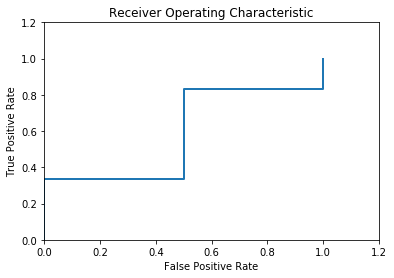

In [12]:
# Plot the RoC 

import matplotlib.pyplot as plt 

%matplotlib inline 

 

plt.plot(_false_positive, _true_positive, lw=2, label='Receiver Operating Characteristic') 

plt.xlim(0.0, 1.2) 

plt.ylim(0.0, 1.2) 

plt.xlabel('False Positive Rate') 

plt.ylabel('True Positive Rate') 

plt.title('Receiver Operating Characteristic') 

plt.show() 